In [1]:
import numpy as np
import pandas as pd

In [2]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [3]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy as hier
from scipy.spatial import distance as ssd

In [5]:
df = pd.read_csv("cluster1_1st10.smi", sep=" ", names=["Smiles", "Name"])
df

,Smiles,Name
0,c1cc[nH+]c(c12)NC([O-])=CC(=N2)c3ccccc3,ZINC000015828584
1,COc1ccc(cc1OC)C[N@H+](CCC[NH3+])CC[C@@]2(c3ccc...,ZINC000015162196
2,n1ccccc1CCC(=O)N(CCC[NH+](C)C)C[C@H]2CC[N@@H+]...,ZINC000012308844
3,C[NH2+]CCC[NH2+]Cc1ccc(c(c1)OC)OCc2ccc(Cl)cc2,ZINC000008377044
4,C[NH2+]CCC[NH2+]Cc1ccc(c(c1)OC)OCc2ccc(Cl)cc2,ZINC000008377044
5,COc1ccc(cc1)CC[N@@H+]2CCC[C@@H](C2)C[N@H+](C)C...,ZINC000011878175
6,COc1ccc(cc1)CC[N@@H+]2CCC[C@@H](C2)C[N@H+](C)C...,ZINC000011878175
7,C[NH+](C)CCC[NH2+]Cc(cc1OC)ccc1OCc2ccc(F)cc2,ZINC000008373857
8,C[NH+](C)CCC[NH2+]Cc(cc1OC)ccc1OCc2ccc(F)cc2,ZINC000008373857


In [6]:
smiles_list = df["Smiles"].tolist()
smiles_list

['c1cc[nH+]c(c12)NC([O-])=CC(=N2)c3ccccc3',
 'COc1ccc(cc1OC)C[N@H+](CCC[NH3+])CC[C@@]2(c3ccccc3)C[C@@H](C)[N@H+](C)C[C@@H]2C',
 'n1ccccc1CCC(=O)N(CCC[NH+](C)C)C[C@H]2CC[N@@H+](CC2)C(C3)Cc(c34)cccc4',
 'C[NH2+]CCC[NH2+]Cc1ccc(c(c1)OC)OCc2ccc(Cl)cc2',
 'C[NH2+]CCC[NH2+]Cc1ccc(c(c1)OC)OCc2ccc(Cl)cc2',
 'COc1ccc(cc1)CC[N@@H+]2CCC[C@@H](C2)C[N@H+](C)Cc3cccc(c3)-n4cccn4',
 'COc1ccc(cc1)CC[N@@H+]2CCC[C@@H](C2)C[N@H+](C)Cc3cccc(c3)-n4cccn4',
 'C[NH+](C)CCC[NH2+]Cc(cc1OC)ccc1OCc2ccc(F)cc2',
 'C[NH+](C)CCC[NH2+]Cc(cc1OC)ccc1OCc2ccc(F)cc2']

In [7]:
names_list = df["Name"].tolist()
names_list

['ZINC000015828584',
 'ZINC000015162196',
 'ZINC000012308844',
 'ZINC000008377044',
 'ZINC000008377044',
 'ZINC000011878175',
 'ZINC000011878175',
 'ZINC000008373857',
 'ZINC000008373857']

In [9]:
mol_list = []
fp_list = []
for i, j in zip(names_list, smiles_list):
    mol = Chem.MolFromSmiles(j)
    fps = Chem.RDKFingerprint(mol)
    mol_list.append(mol)
    fp_list.append(fps)

In [10]:
num_of_mol = len(fp_list)
num_of_mol

9

In [11]:
hmap = np.empty(shape=(num_of_mol, num_of_mol))
hmap

array([[6.90934606e-310, 6.90934606e-310, 3.18299369e-313,
        7.90505033e-323, 2.37151510e-322, 3.24601129e-321,
        4.66062347e-310, 4.66062348e-310, 4.66062348e-310],
       [4.66062348e-310, 2.37151510e-322, 2.37151510e-322,
        4.66062348e-310, 2.75859453e-313, 3.18299369e-313,
        4.66053936e-310, 4.66062348e-310, 2.77170827e-321],
       [4.66062347e-310, 6.90934606e-310, 4.66062348e-310,
        4.66062348e-310, 4.66062348e-310, 1.63041663e-322,
        4.66062348e-310, 4.66062349e-310, 3.95252517e-322],
       [2.37151510e-322, 4.66062348e-310, 4.66062348e-310,
        4.66062348e-310, 4.66062348e-310, 6.32404027e-322,
        2.37151510e-322, 4.66062348e-310, 2.75859453e-313],
       [1.69759663e-313, 4.66053936e-310, 4.66062348e-310,
        1.90215274e-321, 4.66062347e-310, 6.90934606e-310,
        4.66062347e-310, 4.66062347e-310, 2.37151510e-322],
       [2.37151510e-322, 4.66062348e-310, 4.66062348e-310,
        4.66062348e-310, 4.66062348e-310, 4.6606234

In [12]:
for m,fpsi in enumerate(fp_list):
    for n,fpsj in enumerate(fp_list):
        tc = DataStructs.TanimotoSimilarity(fpsj, fpsi)
        hmap[m, n] = tc
hmap

array([[1.        , 0.25396825, 0.24932493, 0.18780252, 0.18780252,
        0.22569738, 0.22569738, 0.18983701, 0.18983701],
       [0.25396825, 1.        , 0.33919338, 0.42283563, 0.42283563,
        0.39609053, 0.39609053, 0.4278607 , 0.4278607 ],
       [0.24932493, 0.33919338, 1.        , 0.19415205, 0.19415205,
        0.34341253, 0.34341253, 0.19791667, 0.19791667],
       [0.18780252, 0.42283563, 0.19415205, 1.        , 1.        ,
        0.29545455, 0.29545455, 0.82845188, 0.82845188],
       [0.18780252, 0.42283563, 0.19415205, 1.        , 1.        ,
        0.29545455, 0.29545455, 0.82845188, 0.82845188],
       [0.22569738, 0.39609053, 0.34341253, 0.29545455, 0.29545455,
        1.        , 1.        , 0.30750894, 0.30750894],
       [0.22569738, 0.39609053, 0.34341253, 0.29545455, 0.29545455,
        1.        , 1.        , 0.30750894, 0.30750894],
       [0.18983701, 0.4278607 , 0.19791667, 0.82845188, 0.82845188,
        0.30750894, 0.30750894, 1.        , 1.        ],


In [15]:
hmap1 = 1-hmap
hmap1

array([[0.        , 0.74603175, 0.75067507, 0.81219748, 0.81219748,
        0.77430262, 0.77430262, 0.81016299, 0.81016299],
       [0.74603175, 0.        , 0.66080662, 0.57716437, 0.57716437,
        0.60390947, 0.60390947, 0.5721393 , 0.5721393 ],
       [0.75067507, 0.66080662, 0.        , 0.80584795, 0.80584795,
        0.65658747, 0.65658747, 0.80208333, 0.80208333],
       [0.81219748, 0.57716437, 0.80584795, 0.        , 0.        ,
        0.70454545, 0.70454545, 0.17154812, 0.17154812],
       [0.81219748, 0.57716437, 0.80584795, 0.        , 0.        ,
        0.70454545, 0.70454545, 0.17154812, 0.17154812],
       [0.77430262, 0.60390947, 0.65658747, 0.70454545, 0.70454545,
        0.        , 0.        , 0.69249106, 0.69249106],
       [0.77430262, 0.60390947, 0.65658747, 0.70454545, 0.70454545,
        0.        , 0.        , 0.69249106, 0.69249106],
       [0.81016299, 0.5721393 , 0.80208333, 0.17154812, 0.17154812,
        0.69249106, 0.69249106, 0.        , 0.        ],


In [16]:
hmap1_array = ssd.squareform(hmap1)
hmap1_array

array([0.74603175, 0.75067507, 0.81219748, 0.81219748, 0.77430262,
       0.77430262, 0.81016299, 0.81016299, 0.66080662, 0.57716437,
       0.57716437, 0.60390947, 0.60390947, 0.5721393 , 0.5721393 ,
       0.80584795, 0.80584795, 0.65658747, 0.65658747, 0.80208333,
       0.80208333, 0.        , 0.70454545, 0.70454545, 0.17154812,
       0.17154812, 0.70454545, 0.70454545, 0.17154812, 0.17154812,
       0.        , 0.69249106, 0.69249106, 0.69249106, 0.69249106,
       0.        ])

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [19]:
linked = linkage(hmap1_array, 'single')
linked

array([[ 7.        ,  8.        ,  0.        ,  2.        ],
       [ 3.        ,  4.        ,  0.        ,  2.        ],
       [ 5.        ,  6.        ,  0.        ,  2.        ],
       [ 9.        , 10.        ,  0.17154812,  4.        ],
       [ 1.        , 12.        ,  0.5721393 ,  5.        ],
       [11.        , 13.        ,  0.60390947,  7.        ],
       [ 2.        , 14.        ,  0.65658747,  8.        ],
       [ 0.        , 15.        ,  0.74603175,  9.        ]])

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [45.0, 45.0, 70.0, 70.0],
  [30.0, 30.0, 57.5, 57.5],
  [15.0, 15.0, 43.75, 43.75],
  [5.0, 5.0, 29.375, 29.375]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.17154811715481166, 0.17154811715481166, 0.0],
  [0.0, 0.572139303482587, 0.572139303482587, 0.17154811715481166],
  [0.0, 0.6039094650205761, 0.6039094650205761, 0.572139303482587],
  [0.0, 0.6565874730021598, 0.6565874730021598, 0.6039094650205761],
  [0.0, 0.746031746031746, 0.746031746031746, 0.6565874730021598]],
 'ivl': ['0', '2', '5', '6', '1', '7', '8', '3', '4'],
 'leaves': [0, 2, 5, 6, 1, 7, 8, 3, 4],
 'color_list': ['C1', 'C2', 'C2', 'C2', 'C0', 'C0', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C0', 'C1', 'C0', 'C2', 'C2', 'C2', 'C2']}

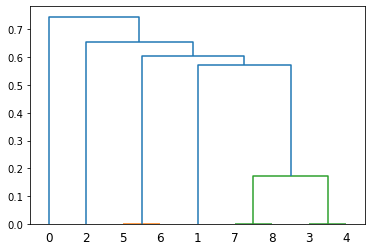

In [20]:
dendrogram(linked)